In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from os import path
import src.lib.utility_classfier as uclf
import src.lib.optimal_threhold_related as thres
import src.lib.fairness_tests as fair

In [2]:
data_path='/Users/lifuchen/Desktop/research/data.csv'
df = pd.read_csv(data_path)

In [3]:
y = df.Class.values
X = df.drop(['GRID','Class'], axis=1)
X.shape

(109490, 87)

In [7]:
X_train, y_train, X_val, y_val, X_test, y_test, X_val_white, X_val_black, y_val_white, y_val_black, X_test_white, X_test_black, y_test_white, y_test_black = fair.split_by_trait(X, y, 'Race_W')
print(X_train.shape[0])
print(y_train.shape[0])

print(X_val.shape[0], X_val_white.shape[0], X_val_black.shape[0])
print(y_val.shape[0], y_val_white.shape[0], y_val_black.shape[0])

print(X_test.shape[0], X_test_white.shape[0], X_test_black.shape[0])
print(y_test.shape[0], y_test_white.shape[0], y_test_black.shape[0])

65694
65694
21898 18825 3073
21898 18825 3073
21898 18883 3015
21898 18883 3015


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
""""
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_scaled = max_abs_scaler.fit_transform(X_train)
X_test_scaled = max_abs_scaler.transform(X_test)
X_test_1_scaled = max_abs_scaler.transform(X_test_1)
X_test_2_scaled = max_abs_scaler.transform(X_test_2)

In [6]:
from sklearn.model_selection import train_test_split
df_train, df_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('df_train num',df_train.shape[0])
print('df_test num',df_test.shape[0])

df_train num 87592
df_test num 21898


In [7]:
y_test_white = y_test[df_test['Race_W']==1]
y_test_white.shape

(18907,)

In [8]:
y_test_black = y_test[df_test['Race_B']==1]
y_test_black.shape

(2991,)

In [9]:
df_test_white = df_test[df_test['Race_W']==1]
X_test_white = df_test_white.drop(['Race_W','Race_B'], axis=1).values
X_test_white.shape

(18907, 85)

In [10]:
df_test_black = df_test[df_test['Race_B']==1]
X_test_black = df_test_black.drop(['Race_W','Race_B'], axis=1).values

In [11]:
X_train = df_train.drop(['Race_W','Race_B'], axis=1).values
X_test = df_test.drop(['Race_W','Race_B'], axis=1).values

In [12]:
import sklearn.preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_scaled = max_abs_scaler.fit_transform(X_train)
X_test_scaled = max_abs_scaler.transform(X_test)
X_test_white_scaled = max_abs_scaler.transform(X_test_white)
X_test_black_scaled = max_abs_scaler.transform(X_test_black)

In [13]:
def case_contro_ratio(y):
    num_of_case = y[y==1].shape[0]
    num_of_control = y[y==0].shape[0]
    ratio = num_of_control/num_of_case
    return ratio, num_of_case, num_of_control
pos_ratio = case_contro_ratio(y_test)[1]/y_test.shape[0]

In [18]:
y_score_dt = uclf.decision_tree(X_train_scaled, y_train,X_test_scaled, y_test)

0.2662970663670978
0.26603389873877065
Classification report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     19953
           1       0.16      0.00      0.01      1945

    accuracy                           0.91     21898
   macro avg       0.53      0.50      0.48     21898
weighted avg       0.84      0.91      0.87     21898

Confusion_matrix
[[19921    32]
 [ 1939     6]]
done in 0.776462s


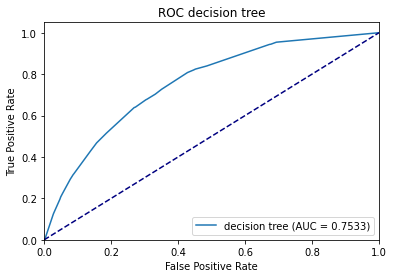

In [21]:
uclf.compute_roc(y_test,y_score_dt,'decision tree')

Classification report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     19953
           1       0.75      0.00      0.01      1945

    accuracy                           0.91     21898
   macro avg       0.83      0.50      0.48     21898
weighted avg       0.90      0.91      0.87     21898

Confusion_matrix
[[19951     2]
 [ 1939     6]]
done in 23.315747s


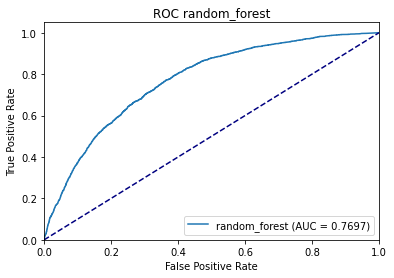

In [22]:
y_score_rf = uclf.random_forest(X_train_scaled, y_train,X_test_scaled, y_test)
uclf.compute_roc(y_test,y_score_rf,'random_forest')

Classification report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     19953
           1       0.39      0.02      0.03      1945

    accuracy                           0.91     21898
   macro avg       0.65      0.51      0.49     21898
weighted avg       0.87      0.91      0.87     21898

Confusion_matrix
[[19906    47]
 [ 1915    30]]
done in 39.468308s


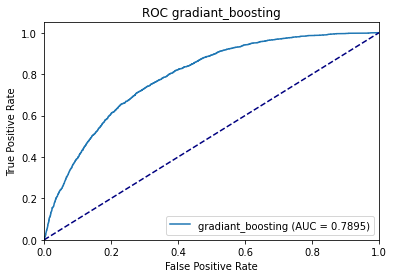

In [23]:
y_score_gb = uclf.gradiant_boosting(X_train_scaled, y_train,X_test_scaled, y_test)
uclf.compute_roc(y_test,y_score_gb,'gradiant_boosting')

In [14]:
y_score_dt_white = uclf.decision_tree(X_train_scaled, y_train, X_test_white_scaled, y_test_white)

0.2662970663670978
0.2675000238115467
Classification report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     17216
           1       0.19      0.00      0.01      1691

    accuracy                           0.91     18907
   macro avg       0.55      0.50      0.48     18907
weighted avg       0.85      0.91      0.87     18907

Confusion_matrix
[[17191    25]
 [ 1685     6]]
done in 1.019925s


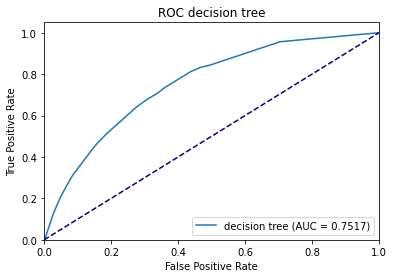

In [15]:
uclf.compute_roc(y_test_white,y_score_dt_white,'decision tree')

In [16]:
y_score_dt_black = uclf.decision_tree(X_train_scaled, y_train, X_test_black_scaled, y_test_black)

0.2662970663670978
0.2567660863847162
Classification report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2737
           1       0.00      0.00      0.00       254

    accuracy                           0.91      2991
   macro avg       0.46      0.50      0.48      2991
weighted avg       0.84      0.91      0.87      2991

Confusion_matrix
[[2730    7]
 [ 254    0]]
done in 0.776529s


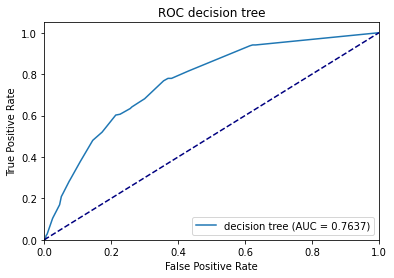

In [17]:
uclf.compute_roc(y_test_black,y_score_dt_black,'decision tree')

In [17]:
eod_dt = fair.get_EOD(y_test_white, y_score_dt_white,y_test_black, y_score_dt_black)
eod_dt

threshold:0.0, J-value:0.0
threshold:0.1, J-value:0.37000000000000005
threshold:0.2, J-value:0.169
threshold:0.30000000000000004, J-value:0.099
threshold:0.4, J-value:0.002
threshold:0.5, J-value:0.003
threshold:0.6000000000000001, J-value:0.0
threshold:0.7000000000000001, J-value:0.0
threshold:0.8, J-value:0.0
threshold:0.9, J-value:0.0
True positive rate of class 1 is  0.684
threshold:0.0, J-value:0.0
threshold:0.1, J-value:0.38
threshold:0.2, J-value:0.168
threshold:0.30000000000000004, J-value:0.07699999999999999
threshold:0.4, J-value:0.0
threshold:0.5, J-value:-0.003
threshold:0.6000000000000001, J-value:-0.001
threshold:0.7000000000000001, J-value:-0.001
threshold:0.8, J-value:0.0
threshold:0.9, J-value:0.0
True positive rate of class 2 is  0.642


0.04200000000000004

In [18]:
sp_dt = fair.get_SP(y_test_white, y_score_dt_white,y_test_black, y_score_dt_black)
sp_dt

threshold:0.0, J-value:0.0
threshold:0.1, J-value:0.37000000000000005
threshold:0.2, J-value:0.169
threshold:0.30000000000000004, J-value:0.099
threshold:0.4, J-value:0.002
threshold:0.5, J-value:0.003
threshold:0.6000000000000001, J-value:0.0
threshold:0.7000000000000001, J-value:0.0
threshold:0.8, J-value:0.0
threshold:0.9, J-value:0.0
Positive prediction rate of class 1 is  0.347
threshold:0.0, J-value:0.0
threshold:0.1, J-value:0.38
threshold:0.2, J-value:0.168
threshold:0.30000000000000004, J-value:0.07699999999999999
threshold:0.4, J-value:0.0
threshold:0.5, J-value:-0.003
threshold:0.6000000000000001, J-value:-0.001
threshold:0.7000000000000001, J-value:-0.001
threshold:0.8, J-value:0.0
threshold:0.9, J-value:0.0
Positive prediction rate of class 2 is  0.294


1.1802721088435375

In [ ]:
y_score_rf_white = uclf.random_forest(X_train_scaled, y_train, X_test_white_scaled, y_test_white)

In [ ]:
uclf.compute_roc(y_test_white,y_score_rf_white,'random forest')

In [ ]:
y_score_rf_black = uclf.random_forest(X_train_scaled, y_train, X_test_black_scaled, y_test_black)

In [ ]:
uclf.compute_roc(y_test_black,y_score_rf_black,'random forest')

In [ ]:
eod_rf = fair.get_EOD(y_test_white, y_score_rf_white,y_test_black, y_score_rf_black)
eod_rf

In [ ]:
sp_rf = fair.get_SP(y_test_white, y_score_rf_white,y_test_black, y_score_rf_black)
sp_rf

In [ ]:
y_score_gb = uclf.gradiant_boosting(X_train_scaled, y_train,X_test_scaled, y_test)

In [ ]:
uclf.compute_roc(y_test,y_score_gb,'gradient boosting')

In [ ]:
y_score_gb_white = uclf.gradiant_boosting(X_train_scaled, y_train, X_test_white_scaled, y_test_white)

In [ ]:
uclf.compute_roc(y_test_white,y_score_gb_white,'gradient boosting')

In [ ]:
y_score_gb_black = uclf.gradiant_boosting(X_train_scaled, y_train, X_test_black_scaled, y_test_black)

In [ ]:
uclf.compute_roc(y_test_black,y_score_gb_black,'gradient boosting')

In [ ]:
eod_gb = fair.get_EOD(y_test_white, y_score_gb_white,y_test_black, y_score_gb_black)
eod_gb

In [ ]:
sp_gb = fair.get_SP(y_test_white, y_score_gb_white,y_test_black, y_score_gb_black)
sp_gb

In [ ]:
y_score = uclf.logic_regression(X_train_scaled, y_train,X_test_scaled, y_test,10)

In [ ]:
threshold_mixed = thres.get_optimal_threshold_Jvalue(y_test, y_score)
threshold_mixed

In [ ]:
tpr_mixed = thres.calculate_tpr(y_test, y_score, threshold=0.1)
tpr_mixed

In [ ]:
pd_mixed = thres.calculate_positive_prediction(y_test, y_score, threshold=0.1)
pd_mixed

In [ ]:
uclf.compute_roc(y_test,y_score,'logistics')

In [ ]:
uclf.plot_prc(y_test,y_score,pos_ratio)

In [ ]:
y_score_white = uclf.logic_regression(X_train_scaled, y_train,X_test_white_scaled, y_test_white,10)

In [ ]:
threshold_white = thres.get_optimal_threshold_Jvalue(y_test_white, y_score_white)
threshold_white

In [ ]:
tpr_white = thres.calculate_tpr(y_test_white, y_score_white, threshold=0.1)
tpr_white

In [ ]:
pd_white = thres.calculate_positive_prediction(y_test_white, y_score_white, threshold=0.1)
pd_white

In [ ]:
y_score_black = uclf.logic_regression(X_train_scaled, y_train,X_test_black_scaled, y_test_black,10)

In [ ]:
threshold_black = thres.get_optimal_threshold_Jvalue(y_test_black, y_score_black)
threshold_black

In [ ]:
tpr_black = thres.calculate_tpr(y_test_black, y_score_black, threshold=0.1)
tpr_black

In [ ]:
pd_black = thres.calculate_positive_prediction(y_test_black, y_score_black, threshold=0.1)
pd_black

In [ ]:
eod = fair.get_EOD(y_test_white, y_score_white,y_test_black, y_score_black)
eod

In [ ]:
sp = fair.get_SP(y_test_white, y_score_white,y_test_black, y_score_black)
sp

In [ ]:
uclf.compute_roc(y_test_white,y_score_white,'logistics')

In [ ]:
uclf.plot_prc(y_test_white,y_score_white,pos_ratio)

In [ ]:
uclf.compute_roc(y_test_black,y_score_black,'logistics')

In [ ]:
uclf.plot_prc(y_test_black,y_score_black,pos_ratio)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
my_tree = DecisionTreeClassifier()

my_tree.fit(X_train, y_train)
y_pred = my_tree.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))